In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("Dataset .csv")

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
data.head(1)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314


In [5]:
data["Restaurant Name"].value_counts().head(19)

Restaurant Name
Cafe Coffee Day       83
Domino's Pizza        79
Subway                63
Green Chick Chop      51
McDonald's            48
Keventers             34
Pizza Hut             30
Giani                 29
Baskin Robbins        28
Barbeque Nation       26
Giani's               22
Barista               22
Dunkin' Donuts        22
Costa Coffee          20
Pind Balluchi         20
Wah Ji Wah            19
Twenty Four Seven     19
Pizza Hut Delivery    19
Sagar Ratna           19
Name: count, dtype: int64

In [6]:
restaurant_counts=data["Restaurant Name"].value_counts()

In [7]:
restaurant_new=data["Restaurant Name"].apply(lambda x: x if restaurant_counts.get(x,0)>20 else "other_res")

In [8]:
restaurant_new.value_counts().shape

(14,)

In [9]:
restaurant_new_dum=pd.get_dummies(restaurant_new)

In [10]:
restaurant_new_dum=restaurant_new_dum.astype(int)

In [11]:
restaurant_new_dum.value_counts().unique

<bound method Series.unique of Barbeque Nation  Barista  Baskin Robbins  Cafe Coffee Day  Domino's Pizza  Dunkin' Donuts  Giani  Giani's  Green Chick Chop  Keventers  McDonald's  Pizza Hut  Subway  other_res
0                0        0               0                0               0               0      0        0                 0          0           0          0       1            9014
                                          1                0               0               0      0        0                 0          0           0          0       0              83
                                          0                1               0               0      0        0                 0          0           0          0       0              79
                                                           0               0               0      0        0                 0          0           0          1       0              63
                                                    

In [12]:
data["Cuisines"].value_counts().head(16)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Pizza, Fast Food                  131
Chinese, Fast Food                118
Mithai, Street Food               116
South Indian                      112
Bakery, Fast Food                 108
Chinese, North Indian             105
Name: count, dtype: int64

In [13]:
cuisines_counts=data["Cuisines"].value_counts()

In [14]:
new_cuisines=data["Cuisines"].apply(lambda x:x if cuisines_counts.get(x,0)>150 else "other_cuisines")

In [15]:
new_cuisines.value_counts()

Cuisines
other_cuisines                    6178
North Indian                       936
North Indian, Chinese              511
Chinese                            354
Fast Food                          354
North Indian, Mughlai              334
Cafe                               299
Bakery                             218
North Indian, Mughlai, Chinese     197
Bakery, Desserts                   170
Name: count, dtype: int64

In [16]:
new_cuisines_dum=pd.get_dummies(new_cuisines)

In [17]:
new_cuisines_dum=new_cuisines_dum.astype(int)

In [18]:
new_cuisines_dum.head(1)

,Bakery,"Bakery, Desserts",Cafe,Chinese,Fast Food,North Indian,"North Indian, Chinese","North Indian, Mughlai","North Indian, Mughlai, Chinese",other_cuisines
0,0,0,0,0,0,0,0,0,0,1


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
lb=LabelEncoder()

In [21]:
data["Rating colorss"]=lb.fit_transform(data["Rating color"])

In [22]:
data["Rating colorss"].value_counts()

Rating colorss
2    3737
4    2148
5    2100
1    1079
0     301
3     186
Name: count, dtype: int64

In [23]:
data["Rating text"].value_counts()

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [25]:
new_data=data[["Longitude","Latitude","Average Cost for two","Has Table booking","Has Online delivery","Is delivering now","Switch to order menu","Aggregate rating","Votes","Country Code","Price range","Rating text"]]

In [26]:
new_data.head()

,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Votes,Country Code,Price range,Rating text
0,121.027535,14.565443,1100,Yes,No,No,No,4.8,314,162,3,Excellent
1,121.014101,14.553708,1200,Yes,No,No,No,4.5,591,162,3,Excellent
2,121.056831,14.581404,4000,Yes,No,No,No,4.4,270,162,4,Very Good
3,121.056475,14.585318,1500,No,No,No,No,4.9,365,162,4,Excellent
4,121.057508,14.584450,1500,Yes,No,No,No,4.8,229,162,4,Excellent


In [27]:

features=["Has Table booking","Has Online delivery","Is delivering now","Switch to order menu"]
for feature in features:
    if feature in new_data.columns:
        # Applying one-hot encoding for each feature
        dummies = pd.get_dummies(data[feature], prefix=feature)
        dummies = dummies.astype(int)
        dummies = dummies.iloc[:, 1:]
        new_data = pd.concat([new_data, dummies], axis=1)
        new_data.drop(columns=[feature], inplace=True)
    else:
        print(f"Warning: {feature} not found in the DataFrame.")

In [28]:
new_data.head()

,Longitude,Latitude,Average Cost for two,Aggregate rating,Votes,Country Code,Price range,Rating text,Has Table booking_Yes,Has Online delivery_Yes,Is delivering now_Yes
0,121.027535,14.565443,1100,4.8,314,162,3,Excellent,1,0,0
1,121.014101,14.553708,1200,4.5,591,162,3,Excellent,1,0,0
2,121.056831,14.581404,4000,4.4,270,162,4,Very Good,1,0,0
3,121.056475,14.585318,1500,4.9,365,162,4,Excellent,0,0,0
4,121.057508,14.584450,1500,4.8,229,162,4,Excellent,1,0,0


In [29]:
new_data_s=pd.concat([new_data,new_cuisines_dum],axis=1)

In [30]:
from sklearn.preprocessing import LabelEncoder


In [31]:
lb=LabelEncoder()

In [32]:
new_data["Rating text"]=lb.fit_transform(new_data["Rating text"])

In [33]:
new_data.head(1)

,Longitude,Latitude,Average Cost for two,Aggregate rating,Votes,Country Code,Price range,Rating text,Has Table booking_Yes,Has Online delivery_Yes,Is delivering now_Yes
0,121.027535,14.565443,1100,4.8,314,162,3,1,1,0,0


In [34]:
new_data_s_s=pd.concat([new_data,restaurant_new_dum],axis=1)

In [35]:
new_data_s_s.head()

,Longitude,Latitude,Average Cost for two,Aggregate rating,Votes,Country Code,Price range,Rating text,Has Table booking_Yes,Has Online delivery_Yes,Is delivering now_Yes,Barbeque Nation,Barista,Baskin Robbins,Cafe Coffee Day,Domino's Pizza,Dunkin' Donuts,Giani,Giani's,Green Chick Chop,Keventers,McDonald's,Pizza Hut,Subway,other_res
0,121.027535,14.565443,1100,4.8,314,162,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,121.014101,14.553708,1200,4.5,591,162,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,121.056831,14.581404,4000,4.4,270,162,4,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,121.056475,14.585318,1500,4.9,365,162,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,121.057508,14.584450,1500,4.8,229,162,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
new_data_s_s.head(1)

,Longitude,Latitude,Average Cost for two,Aggregate rating,Votes,Country Code,Price range,Rating text,Has Table booking_Yes,Has Online delivery_Yes,Is delivering now_Yes,Barbeque Nation,Barista,Baskin Robbins,Cafe Coffee Day,Domino's Pizza,Dunkin' Donuts,Giani,Giani's,Green Chick Chop,Keventers,McDonald's,Pizza Hut,Subway,other_res
0,121.027535,14.565443,1100,4.8,314,162,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
x=new_data_s_s.drop(['Aggregate rating',"Longitude","Latitude"],axis=1)

In [38]:
y=new_data_s_s['Aggregate rating']

In [39]:
#x=new_data_s_s.drop("")

In [40]:
from sklearn.model_selection import train_test_split as tts

In [41]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr= LinearRegression()

In [44]:
lr.fit(x_train,y_train)

LinearRegression()

In [45]:
lr_y_prediction=lr.predict(x_test)

In [46]:
from sklearn.metrics import mean_squared_error as mse

In [47]:
lr_mse_score=mse(y_test,lr_y_prediction)

In [48]:
lr_mse_score

1.3779796678727483

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse_score = mean_squared_error(y_test, lr_y_prediction)
print(f"Mean Squared Error: {mse_score}")

# Calculate Mean Absolute Error (MAE)
mae_score = mean_absolute_error(y_test, lr_y_prediction)
print(f"Mean Absolute Error: {mae_score}")

# Example calculation of R-squared (R²) for additional insight
r2_score = lr.score(x_test, y_test)
print(f"R-squared: {r2_score}")


Mean Squared Error: 1.3779796678727483
Mean Absolute Error: 0.9730734285041842
R-squared: 0.39458976976081284


In [50]:
x_test.head(1)

,Average Cost for two,Votes,Country Code,Price range,Rating text,Has Table booking_Yes,Has Online delivery_Yes,Is delivering now_Yes,Barbeque Nation,Barista,Baskin Robbins,Cafe Coffee Day,Domino's Pizza,Dunkin' Donuts,Giani,Giani's,Green Chick Chop,Keventers,McDonald's,Pizza Hut,Subway,other_res
4731,350,54,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc_model=RandomForestClassifier()

In [53]:
from sklearn.ensemble import RandomForestRegressor
rfc_model = RandomForestRegressor()
rfc_model.fit(x_train, y_train)


RandomForestRegressor()

In [54]:
rfc_model_y_prediction=rfc_model.predict(x_test)

In [55]:
rfc_mse_score=mse(y_test,rfc_model_y_prediction)

In [56]:
rfc_mse_score

0.034508887532770774

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse_score = mean_squared_error(y_test, rfc_model_y_prediction)
print(f"Mean Squared Error: {mse_score}")

# Calculate Mean Absolute Error (MAE)
mae_score = mean_absolute_error(y_test, rfc_model_y_prediction)
print(f"Mean Absolute Error: {mae_score}")

# Example calculation of R-squared (R²) for additional insight
r2_score = rfc_model.score(x_test, y_test)
print(f"R-squared: {r2_score}")


Mean Squared Error: 0.034508887532770774
Mean Absolute Error: 0.1255294675308174
R-squared: 0.9848386489049109


In [58]:
new_data_s_s.corr()

,Longitude,Latitude,Average Cost for two,Aggregate rating,Votes,Country Code,Price range,Rating text,Has Table booking_Yes,Has Online delivery_Yes,Is delivering now_Yes,Barbeque Nation,Barista,Baskin Robbins,Cafe Coffee Day,Domino's Pizza,Dunkin' Donuts,Giani,Giani's,Green Chick Chop,Keventers,McDonald's,Pizza Hut,Subway,other_res
Longitude,1.000000,0.043207,0.045891,-0.116818,-0.085101,-0.698299,-0.078939,-0.181466,0.100488,0.178757,0.018787,0.005911,0.015172,0.017167,0.014854,0.026580,0.011066,0.017401,0.015134,0.023116,0.018867,0.022858,0.013817,0.020873,-0.064467
Latitude,0.043207,1.000000,-0.111088,0.000516,-0.022962,0.019792,-0.166688,-0.129447,0.054658,0.118722,0.015001,-0.023841,0.011798,0.013364,0.002707,0.019075,0.006109,0.013784,0.011927,0.018103,0.014873,0.016943,-0.002229,0.013382,-0.034770
Average Cost for two,0.045891,-0.111088,1.000000,0.051792,0.067783,0.043225,0.075083,0.031439,0.007758,-0.018974,-0.001862,0.000969,-0.001637,-0.003025,-0.004352,-0.002828,-0.001786,-0.002807,-0.002403,-0.003860,-0.003012,-0.003124,-0.001143,-0.003542,0.009720
Aggregate rating,-0.116818,0.000516,0.051792,1.000000,0.313691,0.282189,0.437944,-0.182662,0.189998,0.225699,0.019180,0.058144,0.012877,-0.028811,-0.015258,0.004465,0.014893,0.000847,0.003658,0.000299,0.008050,0.031554,0.024197,0.012982,-0.031043
Votes,-0.085101,-0.022962,0.067783,0.313691,1.000000,0.154530,0.309444,0.203969,0.169422,0.074303,-0.001124,0.112409,-0.013389,-0.017853,-0.027787,-0.015461,0.012805,-0.016353,-0.011688,-0.023508,-0.016642,-0.007713,0.001104,-0.011310,0.020313
Country Code,-0.698299,0.019792,0.043225,0.282189,0.154530,1.000000,0.243327,0.222685,-0.061682,-0.154605,-0.018291,-0.008446,-0.014704,-0.016593,-0.028652,-0.027947,-0.014704,-0.016888,-0.014704,-0.022422,-0.018291,-0.021749,-0.010154,-0.024936,0.071279
Price range,-0.078939,-0.166688,0.075083,0.437944,0.309444,0.243327,1.000000,0.164242,0.501925,0.077918,0.010940,0.091145,0.010355,-0.048193,-0.083215,0.019682,0.010355,-0.049048,-0.042705,-0.065120,-0.053123,0.013682,0.059621,0.017562,0.042261
Rating text,-0.181466,-0.129447,0.031439,-0.182662,0.203969,0.222685,0.164242,1.000000,0.044043,-0.080937,-0.031970,0.036160,-0.039120,-0.004667,-0.050901,-0.041142,0.002124,-0.027932,-0.014631,-0.052755,-0.020558,-0.037448,-0.001834,-0.043270,0.096169
Has Table booking_Yes,0.100488,0.054658,0.007758,0.189998,0.169422,-0.061682,0.501925,0.044043,1.000000,0.101224,-0.016816,-0.013250,-0.017848,-0.020141,-0.034778,-0.033923,-0.017848,-0.020499,-0.017848,-0.027216,-0.022202,-0.026399,-0.020850,-0.030268,0.089269
Has Online delivery_Yes,0.178757,0.118722,-0.018974,0.225699,0.074303,-0.154605,0.077918,-0.080937,0.101224,1.000000,0.101730,-0.030697,0.011773,0.021347,-0.042098,-0.053658,0.036775,0.028573,0.021774,-0.029892,-0.031093,0.059942,0.026995,0.091307,-0.021015


In [59]:
import pandas as pd

# Assuming new_data_s_s is your DataFrame
# Compute the full correlation matrix
correlation_matrix = new_data_s_s.corr()

# Drop "Aggregate rating" from the index and extract its correlation with other columns
aggregate_rating_corr = correlation_matrix["Aggregate rating"].drop("Aggregate rating")

# Display the maximum correlation value with "Aggregate rating"
print((aggregate_rating_corr))


Longitude                 -0.116818
Latitude                   0.000516
Average Cost for two       0.051792
Votes                      0.313691
Country Code               0.282189
Price range                0.437944
Rating text               -0.182662
Has Table booking_Yes      0.189998
Has Online delivery_Yes    0.225699
Is delivering now_Yes      0.019180
Barbeque Nation            0.058144
Barista                    0.012877
Baskin Robbins            -0.028811
Cafe Coffee Day           -0.015258
Domino's Pizza             0.004465
Dunkin' Donuts             0.014893
Giani                      0.000847
Giani's                    0.003658
Green Chick Chop           0.000299
Keventers                  0.008050
McDonald's                 0.031554
Pizza Hut                  0.024197
Subway                     0.012982
other_res                 -0.031043
Name: Aggregate rating, dtype: float64


In [60]:
#Price range  0.437944 --> highest corelation

<Axes: >

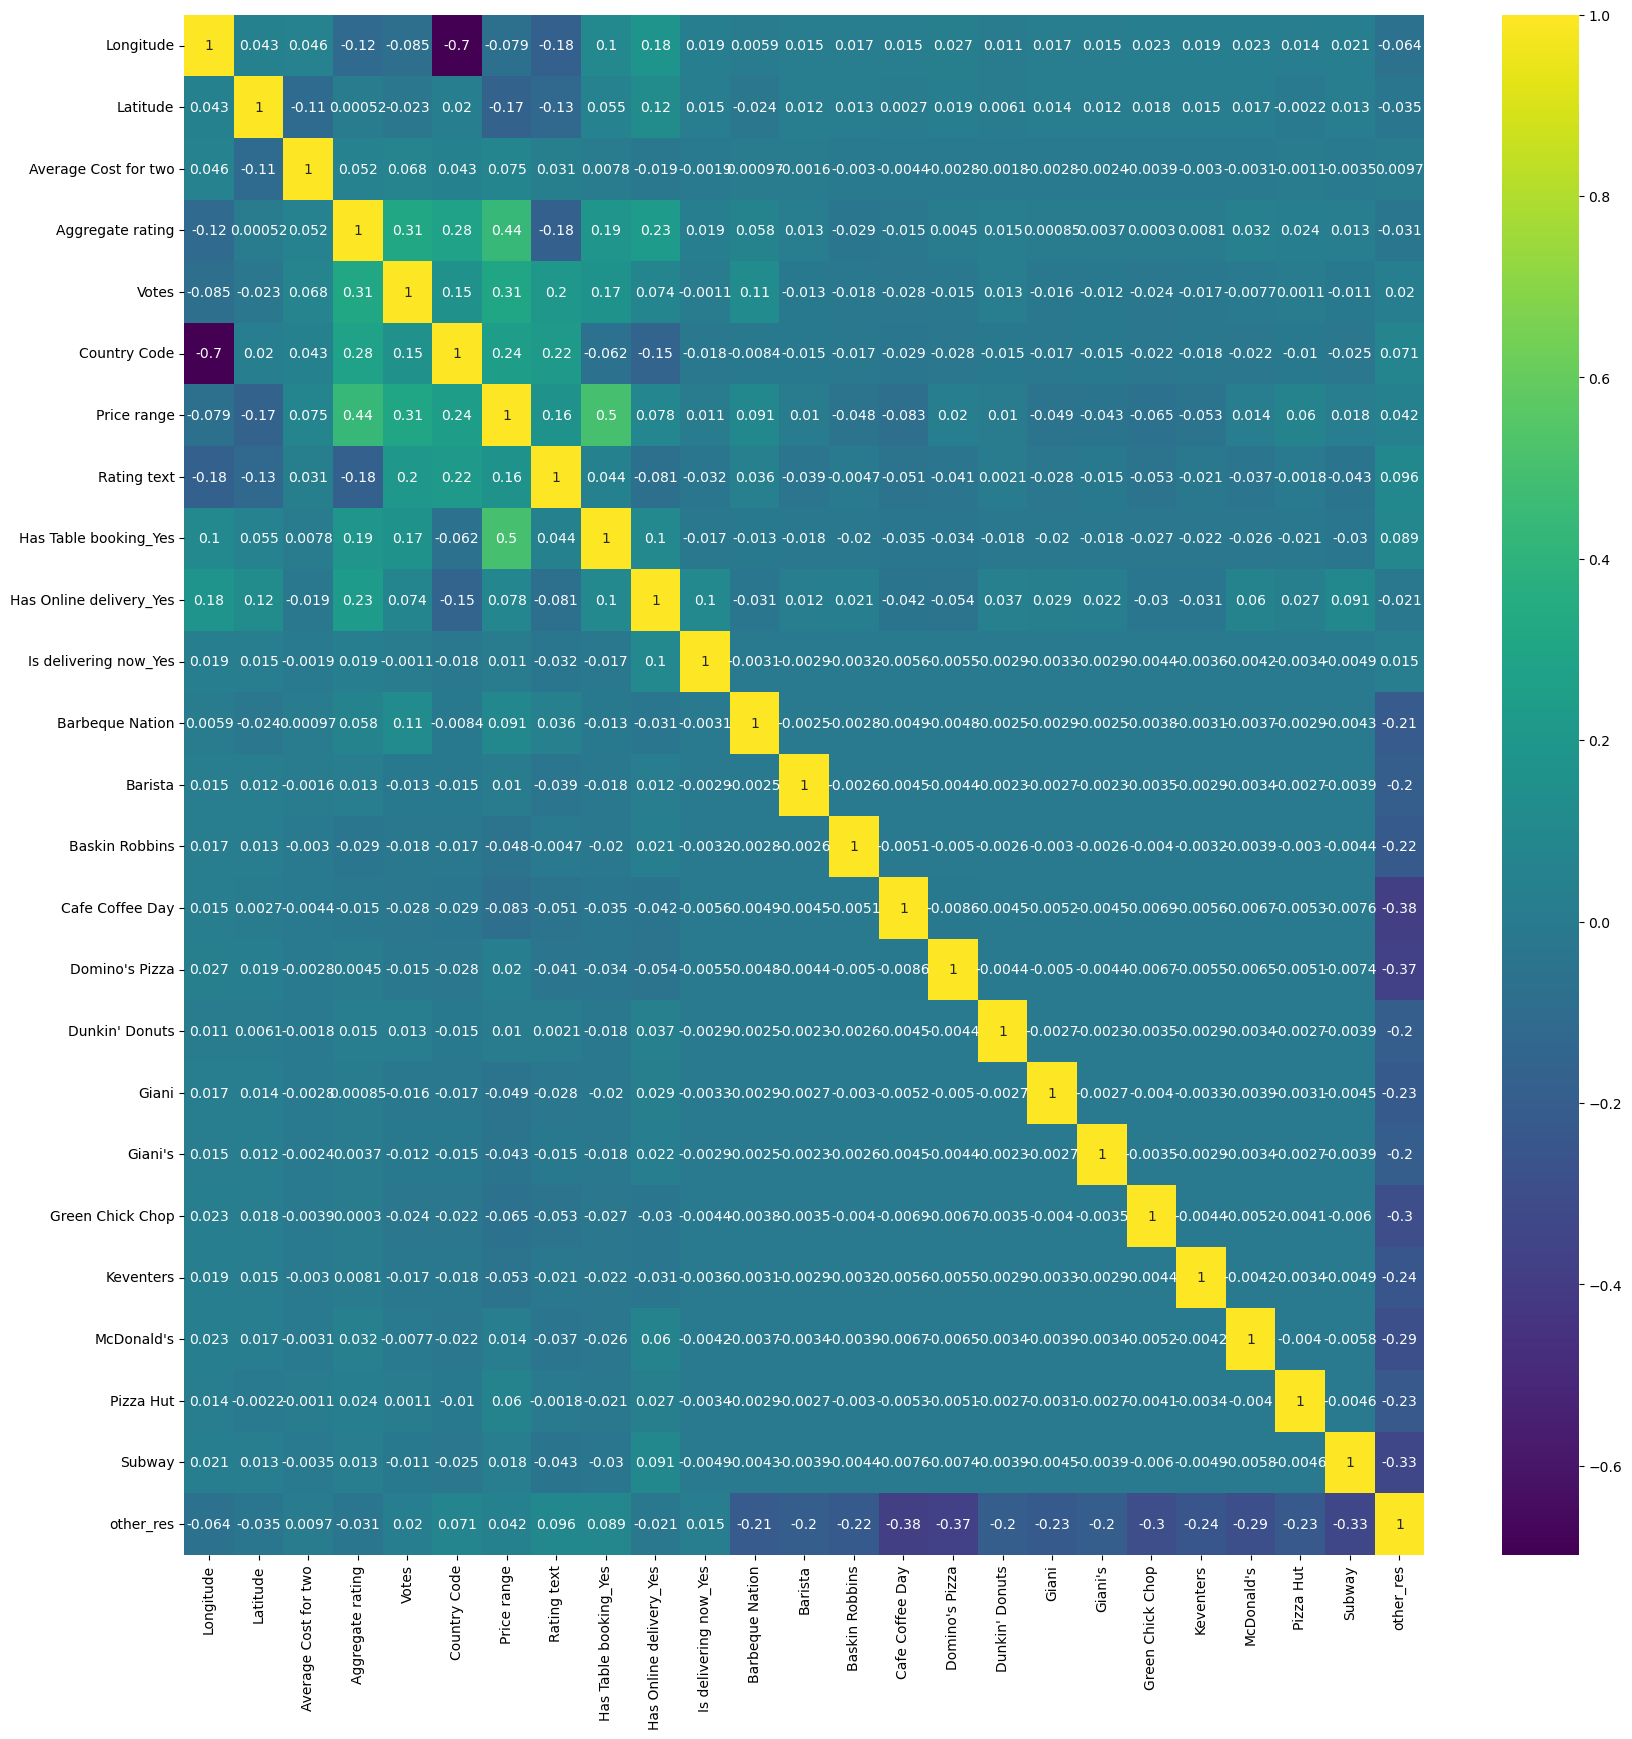

In [68]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sns.heatmap(new_data_s_s.corr(),cmap="viridis",annot=True)

<Axes: ylabel='Price range'>

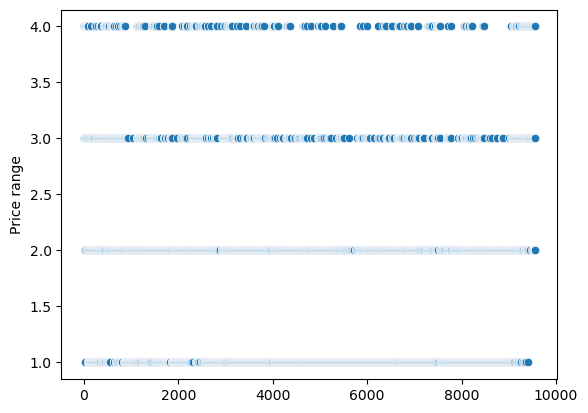

In [71]:
sns.scatterplot(new_data_s_s["Price range"])


{'whiskers': [<matplotlib.lines.Line2D at 0x180024481d0>,
 'caps': [<matplotlib.lines.Line2D at 0x180024499d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x180032ab050>],
 'medians': [<matplotlib.lines.Line2D at 0x1800244b010>],
 'fliers': [<matplotlib.lines.Line2D at 0x180023eb1d0>],
 'means': []}

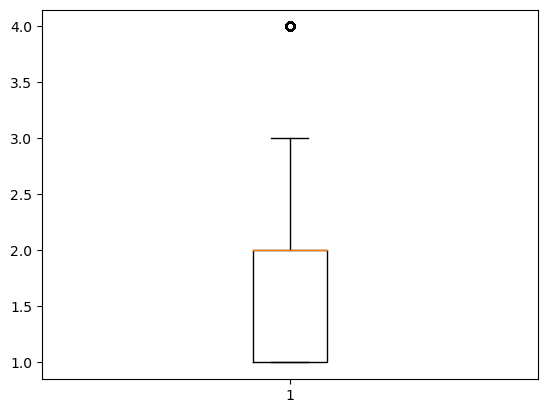

In [77]:
plt.boxplot(new_data_s_s["Price range"])

{'whiskers': [<matplotlib.lines.Line2D at 0x18002494d90>,
 'caps': [<matplotlib.lines.Line2D at 0x18002496310>,
 'boxes': [<matplotlib.lines.Line2D at 0x18002494210>],
 'medians': [<matplotlib.lines.Line2D at 0x18002497950>],
 'fliers': [<matplotlib.lines.Line2D at 0x1800335ab50>],
 'means': []}

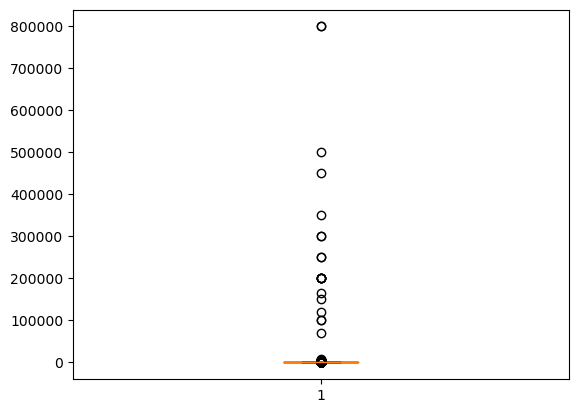

In [78]:
plt.boxplot(new_data_s_s["Average Cost for two"])